This notebook explores the [Monte Carlo Estimator](https://en.wikipedia.org/wiki/Monte_Carlo_method)

---


Consider the following integral:

$\int_0^7{x^2}dx=114.\overline{3}$

One can obtain a decent estimation for large $N$ using the Monte Carlo Estimator:
$F_N=\frac{b-a}{N}\sum_{i=1}^N{f(X_i)}$

In [16]:
import random
from tqdm import tqdm


N = 10000000
a = 0
b = 7
f = lambda x : x**2

inner_sum = 0
for _ in tqdm(range(N)):
    ran = random.uniform(a, b)
    inner_sum += f(ran)
    
result = (b - a) / N * inner_sum
print(result)


100%|██████████| 10000000/10000000 [00:08<00:00, 1209805.27it/s]

114.31125796817604


Now let's apply this method in a slightly different context: approximating $\pi$


For our approximation, we will use the function:
$f(x)=\sqrt{1-x^2}$ as it is the top half of the unit circle.


The area of the unit circle is equal to $\pi$, therefore:
$\int_0^1{\sqrt{1-x^2}}dx=\frac{\pi}{4}$

Now let us estimate the value of pi using this integral

In [20]:
import random
import math
from tqdm import tqdm


N = 10000000
a = 0
b = 1
f = lambda x : math.sqrt(1 - x**2)

inner_sum = 0
for _ in tqdm(range(N)):
    ran = random.uniform(a, b)
    inner_sum += f(ran)
    
result = (b - a) / N * inner_sum
pi_approx = 4 * result  # pi from pi/4
print(pi_approx)


100%|██████████| 10000000/10000000 [00:09<00:00, 1062371.29it/s]

3.1421594706514084


On the [Wikipeida page for the Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview), there is an alternate method for approximaating $\pi$ shown, where points are uniformly scattered over the unit square, and the ratio of points inside the curve to total points plotted can be taken as an approximation of $\frac{\pi}{4}$. Let's try to recreate this method, as well as the nice visualization.

100%|██████████| 10000000/10000000 [00:14<00:00, 693686.25it/s]


3.1427056


KeyboardInterrupt: 

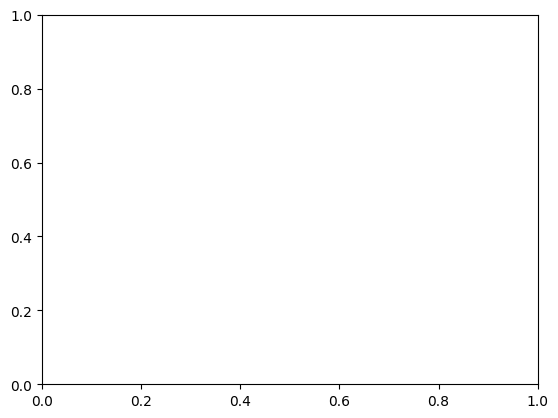

In [23]:
import random
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style


N = 10000000
f = lambda x : math.sqrt(1 - x**2)

x_outside = []
y_outside = []
x_inside = []
y_inside = []

n_inside = 0

# Uniformly scatter points within the unit square
for _ in tqdm(range(N)):
    ran_x = random.uniform(0, 1)
    ran_y = random.uniform(0, 1)
    
    if ran_y < f(ran_x):
        x_inside.append(ran_x)
        y_inside.append(ran_y)
        n_inside += 1
    else:
        x_outside.append(ran_x)
        y_outside.append(ran_y)
        
result = n_inside / N
pi_approx = 4 * result
print(pi_approx)

plt.scatter(x_outside, y_outside)
plt.scatter(x_inside, y_inside)
plt.show()
    